In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


### Creating data to view and fit

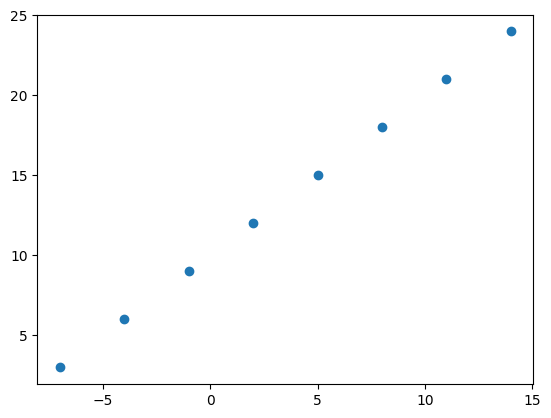

In [23]:
X = tf.constant([-7.0, -4.0, -1.0,  2.0,  5.0,  8.0, 11.0, 14.0])
y = tf.constant([ 3.0,  6.0,  9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

In [24]:
y==X+10 #the relation

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

### Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

In [25]:
# Example input and output shapes of a housing price regression model
infos=tf.constant(["rooms","garage","bethroom"])#shape=3
price=tf.constant([1000000])#shape=1
infos,price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'rooms', b'garage', b'bethroom'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1000000], dtype=int32)>)

In [26]:
X[0].shape , X.shape

(TensorShape([]), TensorShape([8]))

The whole dataset has shape (8,) → 8 numbers.

But a single example from it has shape () → just one number.

📌 Why this matters:
When you build a neural network, you must tell it the shape of a single example, not the whole dataset. That’s called the input shape of the model.



## Your first model : 
In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
Fitting a model - letting the model try to find patterns in the data (how does X get to y).


In [27]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)]
)
model.compile(loss=tf.keras.losses.mae ,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X,axis=1),y,epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 18.7008 - mae: 18.7008
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 18.4196 - mae: 18.4196
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 18.1383 - mae: 18.1383
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 17.8571 - mae: 17.8571
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 17.5758 - mae: 17.5758


Sequential: This creates a linear stack of layers (one after another)
Dense(1): This is a fully connected layer with just 1 neuron
Dense layers connect every input to every output
With 1 neuron, this model will output a single number (like predicting a price, temperature, etc.)

What is a Dense Layer?
Think of a Dense layer like a connection hub where every input connects to every output.
Input Features:    Dense Layer (1 neuron):    Output:
[house_size]  ──────┐
                    │
[bedrooms]    ──────┼────── [neuron] ────── [predicted_price]
                    │
[location]    ──────┘
How it Works:

Every input connects to the neuron: All 3 features connect to that 1 neuron
The neuron does math: It multiplies each input by a weight and adds them up
neuron_output = (house_size × weight1) + (bedrooms × weight2) + (location × weight3) + bias

Produces 1 output: Since there's only 1 neuron, you get 1 prediction

Why "Fully Connected"?

Fully connected = every input touches every neuron
If you had 2 neurons, each input would connect to BOTH neurons

-------------------------------------------------------------------------------------------------------
loss: How the model measures how "wrong" it is

MAE (Mean Absolute Error): Takes the average of absolute differences between predictions and actual values
Example: if actual=10 and prediction=7, error = |10-7| = 3

optimizer: How the model learns and improves

SGD (Stochastic Gradient Descent): A basic learning algorithm that adjusts the model's weights to reduce the loss

metrics: What to track during training (here, also MAE for monitoring)

--------------------------------------------------------------------------------------------------

tf.expand_dims(X, axis=-1): This reshapes your input data

If X was shape (100,) → becomes (100, 1)
Neural networks expect 2D input: (samples, features)
The -1 means "add dimension at the end"

epochs=5: The model will see the entire dataset 5 times

Each epoch = one complete pass through all your training data

This is a simple linear regression model that learns to map input X to output y with a straight line relationship!

In [28]:
#let's try the model
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [29]:
pr=model.predict(tf.expand_dims([16],axis=1))
pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[-13.8983555]], dtype=float32)

In [30]:
#15!?, thats wrong, lets step back and see the last value of loss (10.2007)
pr+10.2007 #25.71 = almost 26 /its not always representive thought

array([[-3.6976557]], dtype=float32)

### Improving our model 
To improve our model, we alter almost every part of the 3 steps we went through before.

Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [31]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 50 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #Remember that potantially Lr is the most important hyper parameter on all of your neural network
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.8334 - mae: 12.8334
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 12.1638 - mae: 12.1638
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 11.4997 - mae: 11.4997
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 10.8391 - mae: 10.8391
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 10.1788 - mae: 10.1788
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 9.5156 - mae: 9.5156
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 8.8459 - mae: 8.8459
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 8.1659 - mae: 8.1659
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 7.4713 - mae: 7.4713
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 6.8720 - mae: 6.8720
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 6.8545 - mae: 6.8545
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 7.1144 - mae: 7.1144
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [32]:
pr=model.predict(tf.expand_dims([16],axis=1))
pr #its now better!!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[26.591309]], dtype=float32)

### Evaluating our model
whent it comes to evaluate a model you should always think of one word "Visualisation"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [33]:
#let's create a bigger dataset 
X=tf.range(-100,100,4)
y=X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

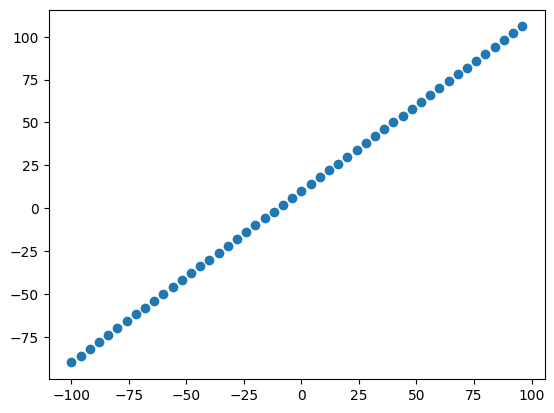

In [34]:
plt.scatter(X,y)

### Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

In [37]:
train_datax=X[:40]
train_datay=y[:40]
vald_datax=X[40:]
vald_datay=y[40:]

### Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

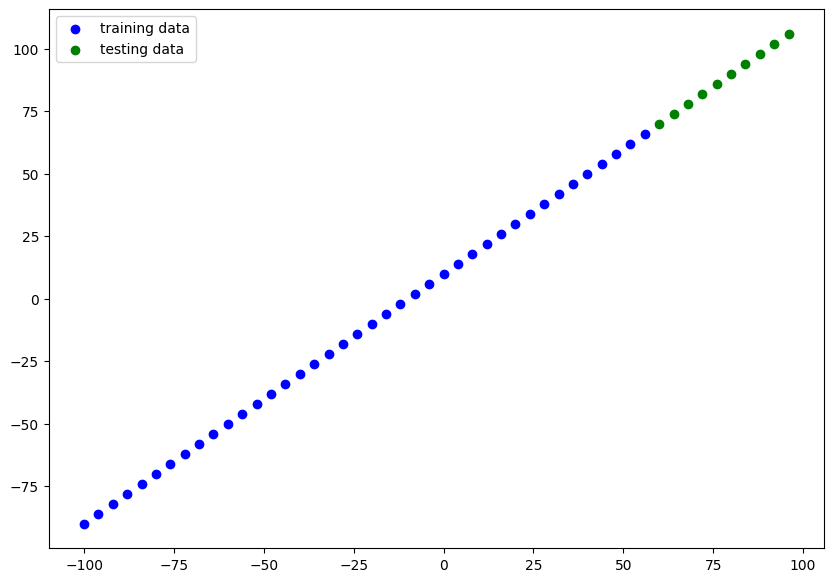

In [39]:
plt.figure(figsize=(10,7))
plt.scatter(train_datax,train_datay,c='b',label="training data")
plt.scatter(vald_datax,vald_datay,c='g',label="testing data")
plt.legend()


Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

In [40]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

### Visualizing the model
After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling summary() on it.

🔑 Note: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [ ]:
# Doesn't work (model not fit/built)
model.summary() #doesnt work

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

You did not tell Keras what shape of input data to expect.
So internally, the model is in an “unbuilt” state — it doesn’t know:

How many inputs come in (1 number? 10 numbers? an image?).

Therefore, it also doesn’t know how many weights to create.

That’s why calling model.summary() failed — there’s no weight matrix to show yet, because the model hasn’t been built.

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [44]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

dense_4 (Dense)

This is a Dense (fully connected) layer.

It has 1 output neuron (since you wrote Dense(1)).

Output shape = (None, 1):

None means the batch size can be anything (flexible).

1 means for every input, the model outputs 1 number (a prediction).

Param # = 2

Why 2 parameters?

Because in linear regression, the equation is:

y=w⋅x+b

w = weight (1 parameter)

b = bias (1 parameter)

Total = 2 trainable parameters.

Trainable params = 2

Both weight and bias will be learned (adjusted) during training.

Non-trainable params = 0

Nothing is frozen — all parameters can be updated.

✅ So, your model is basically just:

y=w⋅x+b

( at some point we will have to freez the learning of some parametres ! )